In [1]:
import pandas as pd 
import os


In [2]:
#Merging 12 files with Sales Data into single file
files = [file for file in os.listdir('./SalesData')]
data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./SalesData/'+file)
    data = pd.concat([data, df])
data.to_csv("all_data.csv", index=False)

In [3]:
all_data = pd.read_csv('all_data.csv')

In [4]:
#Cleaning the data

In [5]:
pd.isnull(all_data).sum()/len(all_data)*100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [6]:
#NaN's are only 0.29% of data so we can drop rows with NaN's

In [7]:
all_data = all_data.dropna()

In [8]:
#Fixing issue with text "Order Date" in column Order Date
all_data = all_data[all_data['Order Date'].str[0:2] != "Or"]

In [9]:
#Simple analysis of data. Checking the best month for sale.

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2].astype("int32")

In [11]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype("int")
all_data['Price Each'] = all_data['Price Each'].astype("float")
all_data["Sales"] = all_data['Quantity Ordered'] * all_data['Price Each']

In [12]:
pd.options.display.float_format = '{:.2f}'.format
all_data[['Month', 'Quantity Ordered', 'Sales']].groupby(["Month"]).sum()

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


In [13]:
#Month with the most orders
results = all_data[['Month', 'Quantity Ordered', 'Sales']].groupby(["Month"]).sum()
results

,Quantity Ordered,Sales
Month,,
1,10903,1822256.73
2,13449,2202022.42
3,17005,2807100.38
4,20558,3390670.24
5,18667,3152606.75
6,15253,2577802.26
7,16072,2647775.76
8,13448,2244467.88
9,13109,2097560.13


Text(0.5, 0, 'Month number')

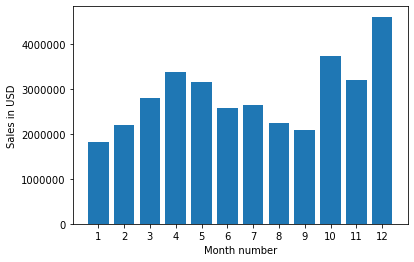

In [14]:
#Visualisation of Sales Data
import matplotlib.pyplot as plt
plt.ticklabel_format(useOffset=False, style = "plain")
months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month number")

In [15]:
#Adding city column
all_data['City'] = all_data["Purchase Address"].apply(lambda x: x.split(",")[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[2].split(" ")[1])
all_data['City'].unique()


array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [16]:
all_data['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

In [17]:
#Finding city and state with the most sales
sales_cities = all_data[['City', 'Quantity Ordered', 'Sales']].groupby(["City"]).sum()
sales_cities

,Quantity Ordered,Sales
City,,
Atlanta,16602,2795498.58
Austin,11153,1819581.75
Boston,22528,3661642.01
Dallas,16730,2767975.40
Los Angeles,33289,5452570.80
New York City,27932,4664317.43
Portland,14053,2320490.61
San Francisco,50239,8262203.91
Seattle,16553,2747755.48


In [18]:
sales_states = all_data[['State', 'Quantity Ordered', 'Sales']].groupby(["State"]).sum()
sales_states

,Quantity Ordered,Sales
State,,
CA,83528,13714774.71
GA,16602,2795498.58
MA,22528,3661642.01
ME,2750,449758.27
NY,27932,4664317.43
OR,11303,1870732.34
TX,27883,4587557.15
WA,16553,2747755.48


Text(0.5, 0, 'City')

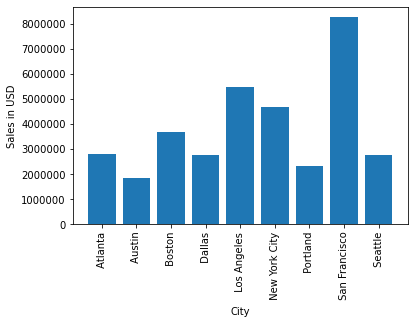

In [19]:
plt.ticklabel_format(useOffset=False, style = "plain")
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, sales_cities["Sales"])
plt.xticks(cities, rotation='vertical')
plt.ylabel("Sales in USD")
plt.xlabel("City")


Text(0.5, 0, 'State')

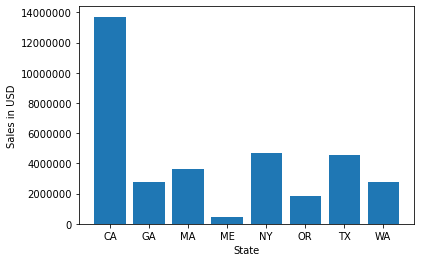

In [20]:
plt.ticklabel_format(useOffset=False, style = "plain")
states = [state for state, df in all_data.groupby("State")]
plt.bar(states, sales_states["Sales"])
plt.xticks(states)
plt.ylabel("Sales in USD")
plt.xlabel("State")

In [21]:
#Searching for hour with the most orders.
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour

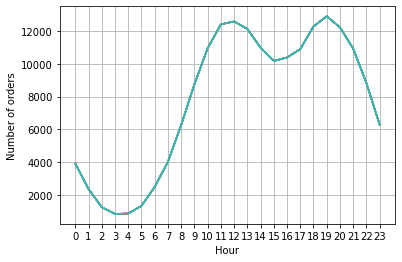

In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours,  all_data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('Number of orders')
plt.xlabel('Hour')
plt.grid()
plt.show()
                                            

In [24]:
#Finding products that are often sold together

In [29]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-29-50d7ea3b1e2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [33]:
#What products are sold the most

In [44]:
product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered = quantity_ordered.sort_values(ascending=False)

Text(0, 0.5, 'Quantity sold')

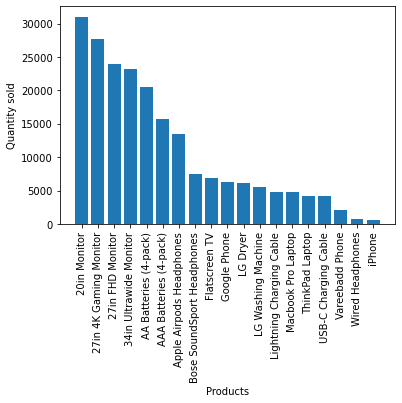

In [45]:
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical')
plt.xlabel("Products")
plt.ylabel("Quantity sold")